In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import requests
import json

In [3]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo")
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [4]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-02-07 to 2024-09-16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [5]:
type(stock.index)

pandas.core.indexes.base.Index

In [6]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [8]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [9]:
stock['close']

2025-02-07    252.3400
2025-02-06    253.4400
2025-02-05    263.3000
2025-02-04    264.4600
2025-02-03    260.7300
                ...   
2024-09-20    217.7000
2024-09-19    213.8900
2024-09-18    214.9400
2024-09-17    214.1300
2024-09-16    217.1600
Name: close, Length: 100, dtype: object

In [10]:
type(stock['close'].iloc[1])

str

In [11]:
stock = stock.astype(float)
type(stock['close'].iloc[1])

numpy.float64

# Sample Data

In [12]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2024-11-08,214.160,216.700,212.7809,213.72,3201038.0
2024-09-27,223.000,224.150,220.7700,220.84,3830335.0
2024-10-03,219.500,222.830,219.2700,222.72,3788265.0
2025-01-07,223.350,226.711,222.8300,223.96,3299701.0
2025-01-21,224.990,227.450,222.8302,224.26,3982203.0
2025-01-31,256.050,257.235,251.8900,255.70,7203519.0
2024-09-23,218.000,220.620,217.2700,220.50,4074755.0
2024-11-19,206.500,210.330,206.1900,210.25,2860746.0
2024-12-10,228.400,234.390,227.8000,231.72,4769531.0
2024-12-18,229.035,229.035,220.0300,220.17,4152517.0


# Summarize Data

In [13]:
summary = stock.describe()
summary

,open,high,low,close,volume
count,100.00000,100.000000,100.000000,100.00000,1.000000e+02
mean,224.53720,226.582550,222.384723,224.79040,4.353919e+06
std,11.94152,12.403756,11.578703,12.12661,2.157310e+06
min,204.13000,207.700000,203.510000,204.90000,1.186216e+06
25%,217.97250,219.402500,215.140075,217.73750,3.176559e+06
50%,223.07000,224.672300,221.217500,223.31000,3.663579e+06
75%,229.42250,232.477475,227.975000,230.03000,4.976172e+06
max,265.71000,265.720000,261.180000,264.46000,1.538189e+07


# Visualize Data

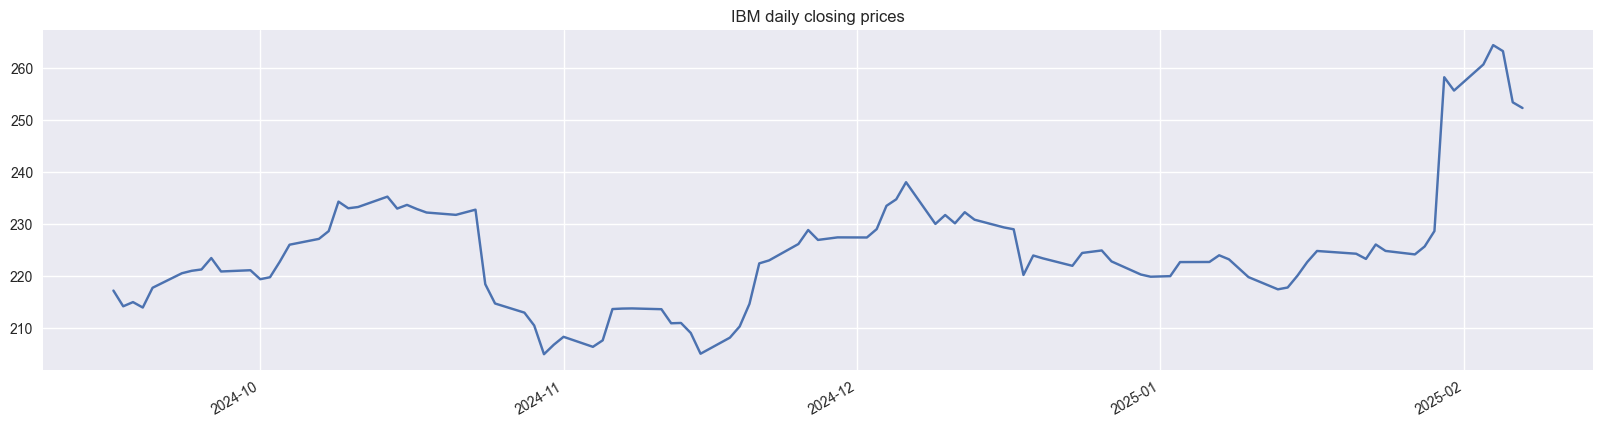

In [14]:
stock['close'].plot(figsize=(20,5), title='IBM daily closing prices'), plt.show();

# Exploring Signals

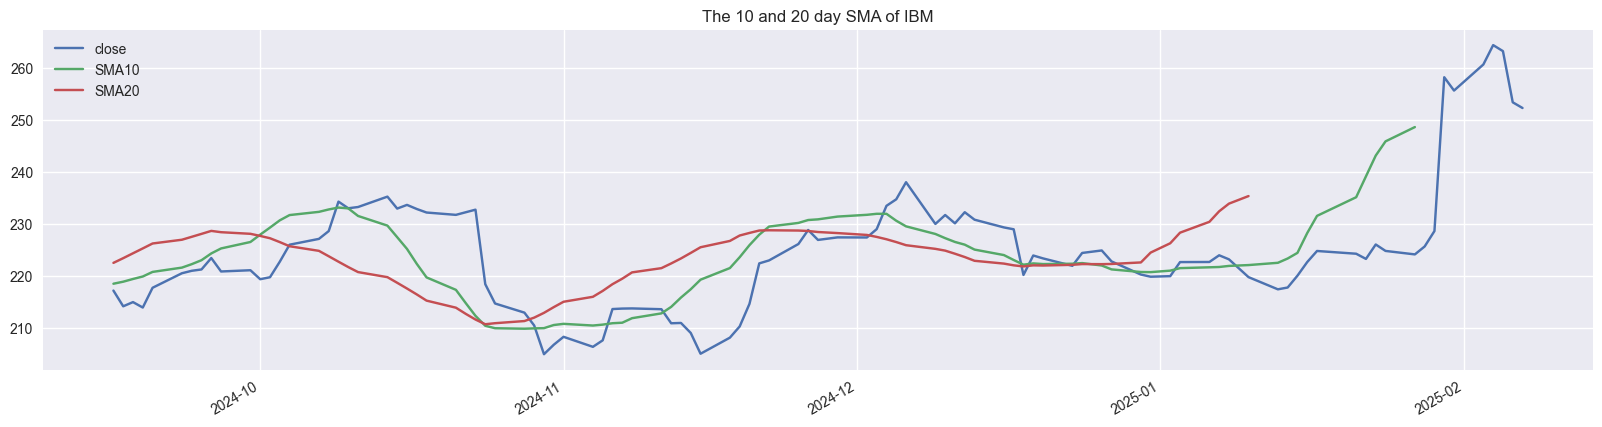

In [15]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title = 'The 10 and 20 day SMA of IBM'), plt.show();


# Some more issues with importing data

In [16]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2025-02-07,255.28,256.93,252.0200,252.34,3370284.0,NaN,NaN
2025-02-06,262.98,263.38,252.7300,253.44,6128293.0,NaN,NaN
2025-02-05,265.71,265.72,261.1800,263.30,6165096.0,NaN,NaN
2025-02-04,260.00,265.25,258.1233,264.46,6077652.0,NaN,NaN
2025-02-03,252.40,262.06,251.8400,260.73,8408523.0,NaN,NaN


In [17]:
stock = stock.sort_index(ascending = True)
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2024-09-16,215.88,217.90,215.52,217.16,4176257.0,218.479,222.4995
2024-09-17,217.25,218.84,213.00,214.13,5635210.0,218.871,223.4045
2024-09-18,214.13,216.86,213.59,214.94,3482764.0,219.393,224.3460
2024-09-19,218.01,218.48,210.37,213.89,5279559.0,219.872,225.2825
2024-09-20,214.33,217.85,213.74,217.70,9958980.0,220.755,226.2320


## Now when we plot our SMA it extends across whole time frame

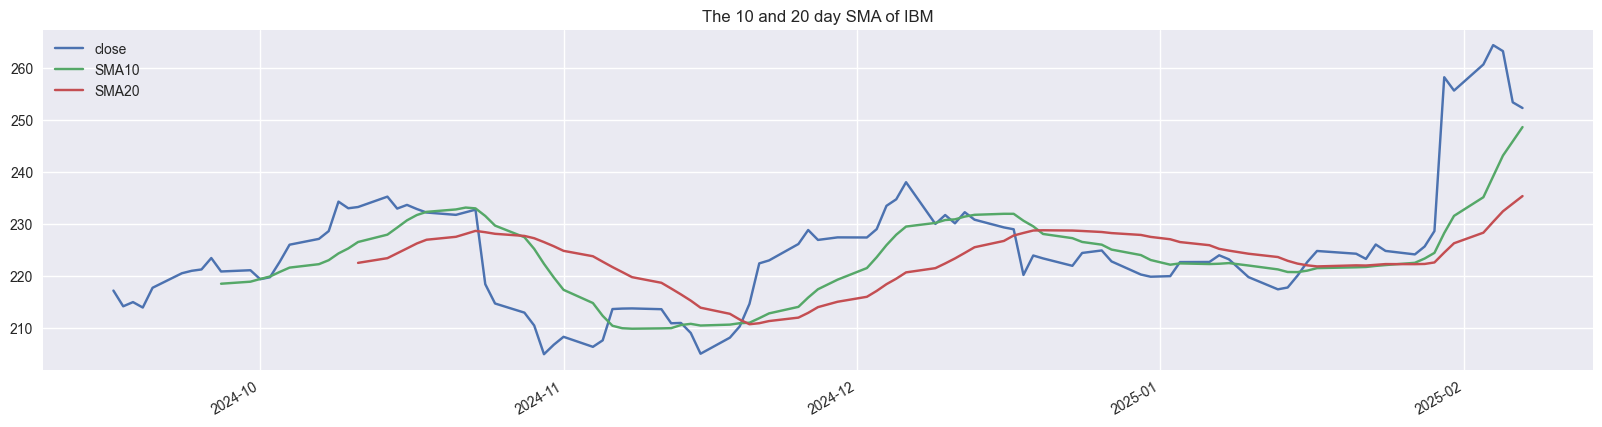

In [18]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title = 'The 10 and 20 day SMA of IBM'), plt.show();


In [19]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2024-09-16,215.88,217.90,215.52,217.16,4176257.0,NaN,NaN
2024-09-17,217.25,218.84,213.00,214.13,5635210.0,NaN,NaN
2024-09-18,214.13,216.86,213.59,214.94,3482764.0,NaN,NaN
2024-09-19,218.01,218.48,210.37,213.89,5279559.0,NaN,NaN
2024-09-20,214.33,217.85,213.74,217.70,9958980.0,NaN,NaN


              open     high      low   close     volume    SMA10     SMA20
2024-10-11  233.25  233.440  230.460  233.26  3469322.0  226.520  222.4995
2024-10-14  233.57  236.120  233.170  235.26  2524389.0  227.938  223.4045
2024-10-15  236.40  237.370  232.710  232.96  3350556.0  229.299  224.3460
2024-10-16  232.11  233.880  231.120  233.67  2846669.0  230.693  225.2825
2024-10-17  232.00  233.145  230.655  232.88  5040092.0  231.709  226.2320


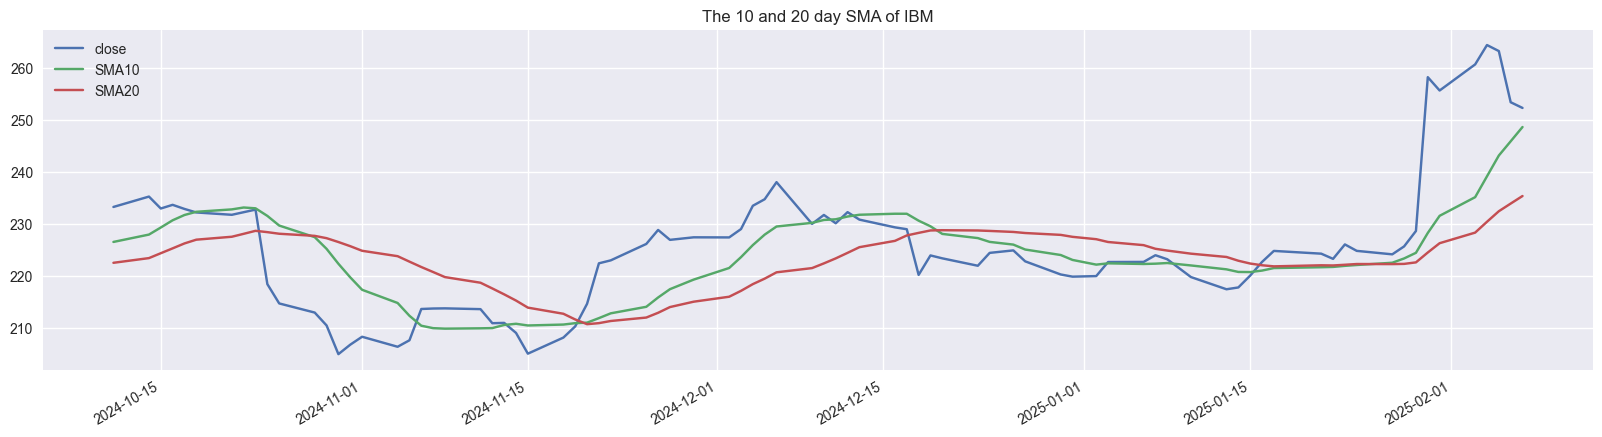

In [20]:
stock.dropna(inplace=True)
print(stock.head())
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20,5), grid = True, title = 'The 10 and 20 day SMA of IBM'), plt.show();


# Evaluating Signals

In [21]:
signal = pd.DataFrame()
signal['crossover'] = stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2025-02-03,6.8320
2025-02-04,8.7615
2025-02-05,10.7340
2025-02-06,12.0000
2025-02-07,13.2960


In [22]:
stock = stock.join(signal, how='left')
stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2025-02-03,252.40,262.06,251.8400,260.73,8408523.0,235.148,228.3160,6.8320
2025-02-04,260.00,265.25,258.1233,264.46,6077652.0,239.168,230.4065,8.7615
2025-02-05,265.71,265.72,261.1800,263.30,6165096.0,243.172,232.4380,10.7340
2025-02-06,262.98,263.38,252.7300,253.44,6128293.0,245.912,233.9120,12.0000
2025-02-07,255.28,256.93,252.0200,252.34,3370284.0,248.666,235.3700,13.2960


In [23]:
signal['close-close'] = stock['close'].diff()
signal.head()

,crossover,close-close
2024-10-11,4.0205,NaN
2024-10-14,4.5335,2.00
2024-10-15,4.9530,-2.30
2024-10-16,5.4105,0.71
2024-10-17,5.4770,-0.79


# Very Basic Method to Calculate Information Coefficient

In [24]:
signal.dropna(inplace=True)
quality = (signal['crossover'] > 0) & (signal['close-close'] > 0) | (signal['crossover'] < 0) & (signal['close-close'] < 0)
quality.head()

2024-10-14     True
2024-10-15    False
2024-10-16     True
2024-10-17    False
2024-10-18    False
dtype: bool

In [25]:
quality = quality.astype(int)
quality.head()
# 1 is true, 0 is false

2024-10-14    1
2024-10-15    0
2024-10-16    1
2024-10-17    0
2024-10-18    0
dtype: int64

In [26]:
proportion_correct = quality.sum() / quality.count()
proportion_correct

np.float64(0.5125)

# Simple Way to Find Spearman Correlation Coefficient

In [27]:
signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,0.056576
close-close,0.056576,1.000000
